Reference:
* Sebastian Raschka, Yuxi Hayden Liu, and Vahid Mirjalili. Machine Learning with PyTorch and Scikit-Learn: Develop machine learning and deep learning models with Python. Packt Publishing Ltd, 2022.

## Logistic Regression

In [1]:
from IPython.display import Image
from IPython.display import display

display(Image(url="https://raw.githubusercontent.com/cfteach/NNDL_DATA621/webpage-src/DATA621/DATA621/images/logreg_flowchart.png", width=700))



Loss function

In [2]:
display(Image(url="https://raw.githubusercontent.com/cfteach/NNDL_DATA621/webpage-src/DATA621/DATA621/images/logreg_loss.png", width=700))


Gradient descent for logistic regression

In [3]:
display(Image(url="https://raw.githubusercontent.com/cfteach/NNDL_DATA621/webpage-src/DATA621/DATA621/images/logreg_gradientdescent.png", width=700))


### Using the Iris data

In [4]:
import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Plotting the Iris data

(50, 2)
(50, 2)


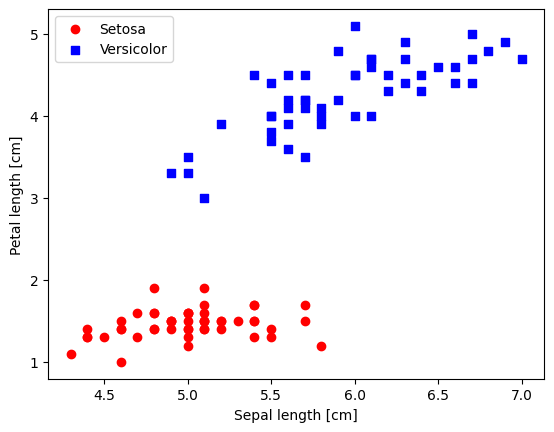

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



# select setosa and versicolor
#y = df.iloc[0:100, 4].values

y = df.iloc[:, 4].values
X = df.iloc[:, [0, 2]].values  # [0,2] extract sepal length and petal length

# Map y values to 0, 1, or -1
y_mapped = np.select(
    [y == 'Iris-setosa', y == 'Iris-versicolor'],  # Conditions
    [0, 1],                                        # Values to assign if the condition is True
    default=-1                                     # Value to assign if none of the conditions are True
)


mask = (y_mapped == 0) | (y_mapped == 1)  # Mask for selecting only 0 and 1 in y_mapped


X_filtered = X[mask]
y_filtered = y_mapped[mask]


# Filter the first 50 occurrences of category 0
mask_0 = (y_filtered == 0)
X_0 = X_filtered[mask_0][:50]

# Filter the first 50 occurrences of category 1
mask_1 = (y_filtered == 1)
X_1 = X_filtered[mask_1][:50]


print(np.shape(X_0))
print(np.shape(X_1))


# plot data
plt.scatter(X_0[:, 0], X_0[:, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X_1[:, 0], X_1[:, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

### Standardize Data

This can be very helpful: as we already saw, gradient descent is one of many algorithms that benefit from feature scaling.

In [6]:
X_std = np.copy(X_filtered)
X_std[:,0] = (X_filtered[:,0]-X_filtered[:,0].mean())/X_filtered[:,0].std()
X_std[:,1] = (X_filtered[:,1]-X_filtered[:,1].mean())/X_filtered[:,1].std()

### Logistic Regression

In [7]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
       Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss.mean())
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Training the Logistic Regression model

In [8]:
lrgd = LogisticRegressionGD(eta=0.25, n_iter=500, random_state=1)
lrgd.fit(X_std,
         y_filtered)

In [9]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    #label=f'Class {cl}',
                    edgecolor='black')

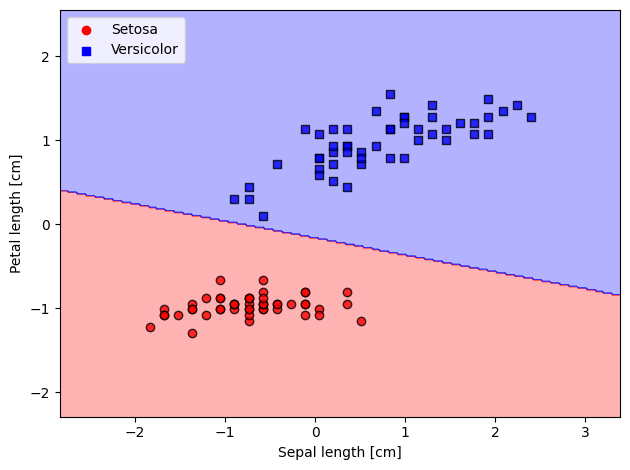

In [10]:
plot_decision_regions(X=X_std,
                      y=y_filtered,
                      classifier=lrgd)

# plot data
plt.scatter(X_0[:, 0], X_0[:, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X_1[:, 0], X_1[:, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

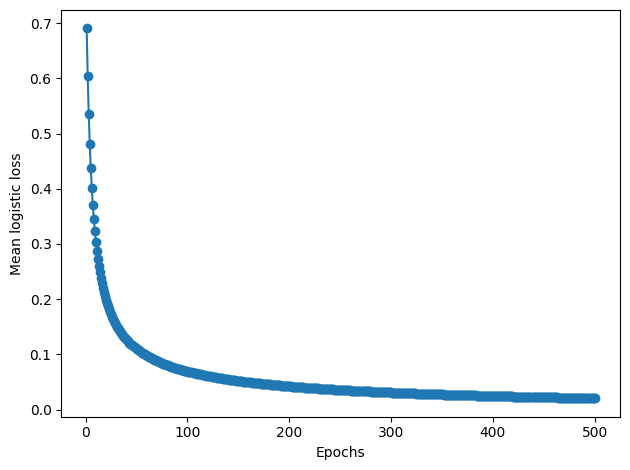

In [11]:
plt.plot(range(1, len(lrgd.losses_) + 1), lrgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean logistic loss')

plt.tight_layout()
plt.show()

Accuracy

In [12]:
y_pred = lrgd.predict(X_std)

accuracy = np.sum(y_pred == y_filtered) / len(y_filtered)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


### Augmenting complexity of decision boundary

In [13]:
import numpy as np

class LogisticRegressionGD_db:
    """Gradient descent-based logistic regression classifier with polynomial feature augmentation.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    degree : int, optional (default=2)
      Degree of polynomial features (e.g., 2 for quadratic).
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
       Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, degree=2, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.degree = degree
        self.random_state = random_state

    def _augment_features(self, X):
        """Augment feature matrix with polynomial terms up to the specified degree."""
        from sklearn.preprocessing import PolynomialFeatures
        poly = PolynomialFeatures(self.degree, include_bias=False)
        return poly.fit_transform(X)

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        # Augment feature space with polynomial features
        X_augmented = self._augment_features(X)

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X_augmented.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X_augmented)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X_augmented.T.dot(errors) / X_augmented.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X_augmented.shape[0]
            self.losses_.append(loss.mean())
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        # Augment features before prediction
        X_augmented = self._augment_features(X)
        return np.where(self.activation(self.net_input(X_augmented)) >= 0.5, 1, 0)


In [41]:
lrgd_db = LogisticRegressionGD_db(eta=0.25, n_iter=500, random_state=1, degree=10)
lrgd_db.fit(X_std, y_filtered)

<ipython-input-13-ad35c1f13184>:70: RuntimeWarning: divide by zero encountered in log
  loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X_augmented.shape[0]


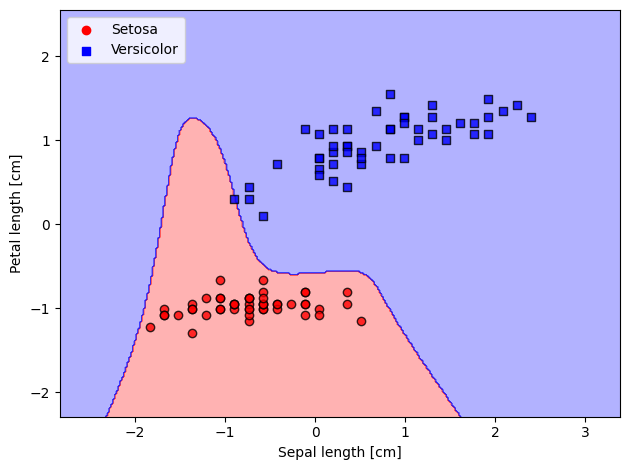

In [42]:
plot_decision_regions(X=X_std,
                      y=y_filtered,
                      classifier=lrgd_db)

# plot data
plt.scatter(X_0[:, 0], X_0[:, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X_1[:, 0], X_1[:, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Adding Regularization

In [ ]:
display(Image(url="https://raw.githubusercontent.com/cfteach/NNDL_DATA621/webpage-src/DATA621/DATA621/images/variance_bias_tradeoff.png", width=700))


In [34]:
class LogisticRegressionGD_reg:
    """Gradient descent-based logistic regression classifier with polynomial feature augmentation and L2 regularization.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    degree : int, optional (default=2)
      Degree of polynomial features (e.g., 2 for quadratic).
    alpha : float, optional (default=0.01)
      Regularization strength (L2 penalty).
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
       Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, degree=2, alpha=0.01, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.degree = degree
        self.alpha = alpha  # L2 regularization term
        self.random_state = random_state

    def _augment_features(self, X):
        """Augment feature matrix with polynomial terms up to the specified degree."""
        from sklearn.preprocessing import PolynomialFeatures
        poly = PolynomialFeatures(self.degree, include_bias=False)
        return poly.fit_transform(X)

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        # Augment feature space with polynomial features
        X_augmented = self._augment_features(X)

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X_augmented.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X_augmented)
            output = self.activation(net_input)
            errors = (y - output)

            # Gradient descent with L2 regularization for weights
            self.w_ += self.eta * (X_augmented.T.dot(errors) / X_augmented.shape[0] - self.alpha * self.w_)
            self.b_ += self.eta * errors.mean()

            # Compute loss with L2 regularization term
            loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X_augmented.shape[0]
            loss += (self.alpha / 2.0) * np.sum(self.w_ ** 2)  # L2 regularization term
            self.losses_.append(loss.mean())
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        # Augment features before prediction
        X_augmented = self._augment_features(X)
        return np.where(self.activation(self.net_input(X_augmented)) >= 0.5, 1, 0)

In [43]:
lrgd_reg = LogisticRegressionGD_reg(eta=0.25, n_iter=500, random_state=1, degree=14, alpha=0.1)
lrgd_reg.fit(X_std, y_filtered)

<ipython-input-34-5048418eb8c6>:75: RuntimeWarning: divide by zero encountered in log
  loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X_augmented.shape[0]


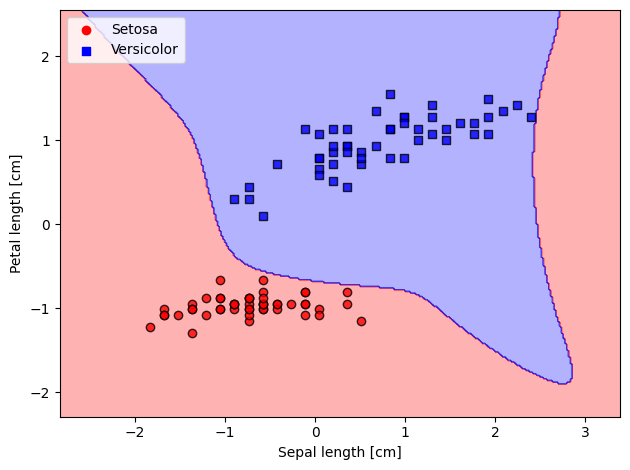

In [44]:
plot_decision_regions(X=X_std,
                      y=y_filtered,
                      classifier=lrgd_reg)

# plot data
plt.scatter(X_0[:, 0], X_0[:, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X_1[:, 0], X_1[:, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

* The L2 regularization (used in Ridge regression) tends to make all weights small but non-zero. It is a smooth regularization. Different from L1 (Lasso), which tends to introduce sparsity, i.e., zeroing some weights.  

* It can be proved that by increasing the regularization term reduce the weights and prevent overfitting. If too high though, can cause bias and underfitting.

### Introduction to Non-Linear Problems

Let's create another dataset, which is non-linear and corresponding to the logical XOR

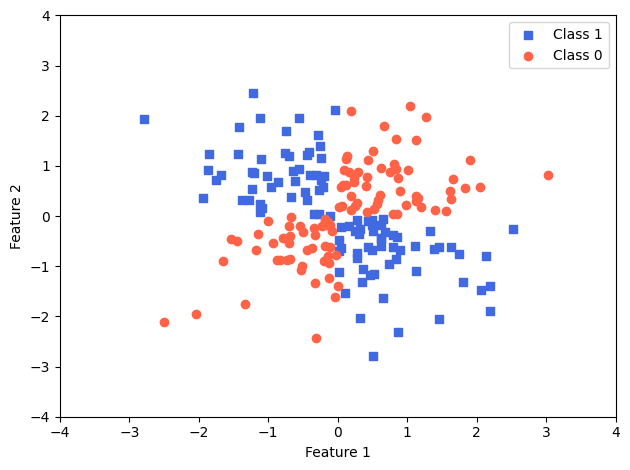

In [47]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue',
            marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato',
            marker='o',
            label='Class 0')

plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [52]:
lrgd_reg = LogisticRegressionGD_reg(eta=0.25, n_iter=500, random_state=1, degree=2, alpha=0.01)
lrgd_reg.fit(X_xor, y_xor)

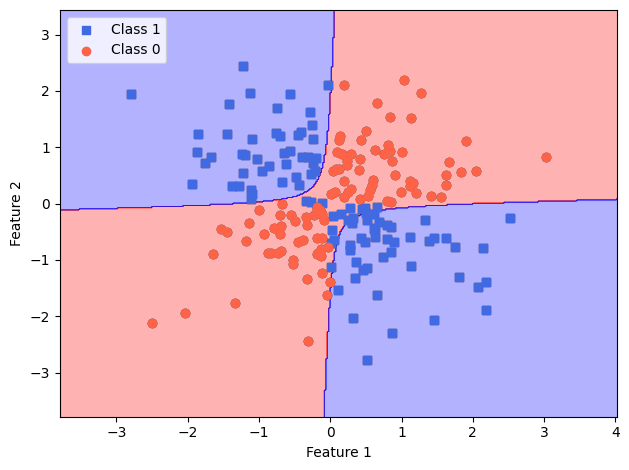

In [53]:
plot_decision_regions(X=X_xor,
                      y=y_xor,
                      classifier=lrgd_reg)

# plot data
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue',
            marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato',
            marker='o',
            label='Class 0')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()